In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Load dataset
df = pd.read_csv("TASK-ML-INTERN.csv")  # Replace with actual file name

# Inspect dataset
print("Dataset Head:")
print(df.head())

Dataset Head:
           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443       

In [2]:
df

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


In [3]:
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
hsi_id=df[['hsi_id']]
df_selected = df.iloc[:, 1:451]
# Handle missing values (e.g., impute with median)
df_selected.fillna(df_selected.median(), inplace=True)


Summary Statistics:
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      0.044528    0.0437

In [4]:
df_selected

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,0.402912,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,0.327545,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,0.437731,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,0.427200,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


In [5]:
X = df_selected.iloc[:, 0:448]
X

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.680883,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.701600,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.671400,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.728588,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.779194,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,0.402912,...,0.741594,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839
496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,0.327545,...,0.642285,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733
497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,0.437731,...,0.784919,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187
498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,0.427200,...,0.748725,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383


In [6]:
y = df_selected['vomitoxin_ppb']
# Normalize spectral data

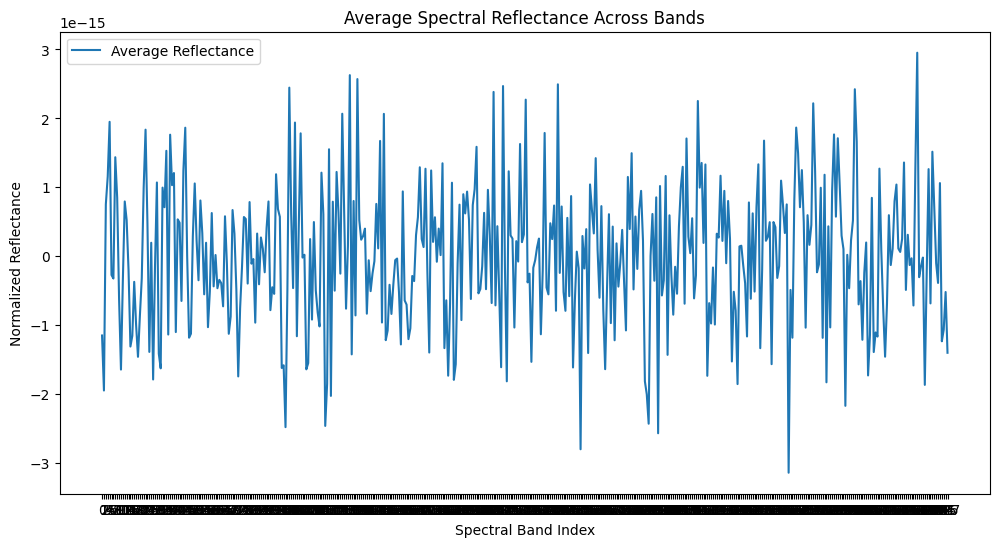

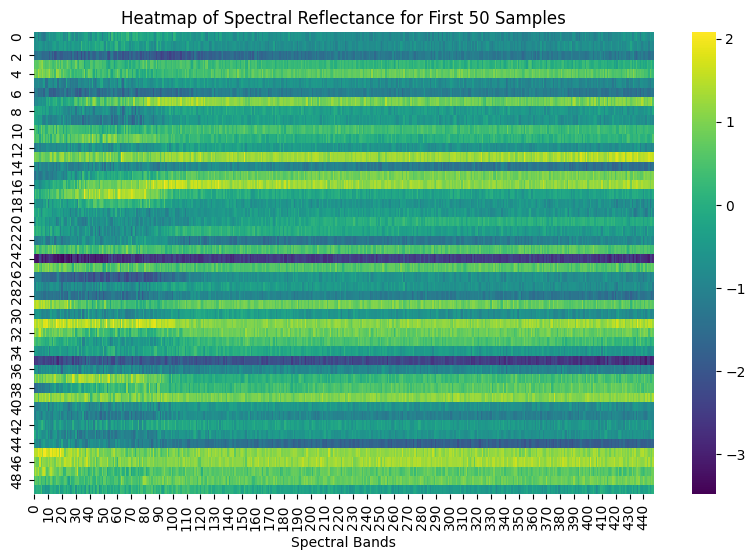

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Visualization: Average spectral reflectance across bands
plt.figure(figsize=(12, 6))
plt.plot(df_scaled.mean(), label='Average Reflectance')
plt.xlabel('Spectral Band Index')
plt.ylabel('Normalized Reflectance')
plt.title('Average Spectral Reflectance Across Bands')
plt.legend()
plt.show()

# Heatmap for a subset of samples
plt.figure(figsize=(10, 6))
sns.heatmap(df_scaled.iloc[:50, :], cmap='viridis', xticklabels=10)
plt.xlabel('Spectral Bands')
plt.title('Heatmap of Spectral Reflectance for First 50 Samples')
plt.show()


In [8]:
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Reshape

Explained Variance Ratio: 0.9725099489592633


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 360ms/step - loss: 108853608.0000 - mae: 2721.0188 - val_loss: 299006912.0000 - val_mae: 4412.9414
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 143092048.0000 - mae: 3204.7517 - val_loss: 298998080.0000 - val_mae: 4412.4644
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 125274992.0000 - mae: 2932.9575 - val_loss: 298833984.0000 - val_mae: 4404.6870
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 114780656.0000 - mae: 3023.3896 - val_loss: 295155392.0000 - val_mae: 4285.5977
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 215298656.0000 - mae: 3441.7598 - val_loss: 270741632.0000 - val_mae: 4569.8896
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 77677592.0000 - mae: 3210.2991 - val_loss: 230333088.0000 - val_mae: 5340.6421
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 90655272.0000 - mae: 3605.2996 - val_loss: 217152656.0000 - val_mae: 4785.0195
Epoch 8/300
13/13 ━━━━━━

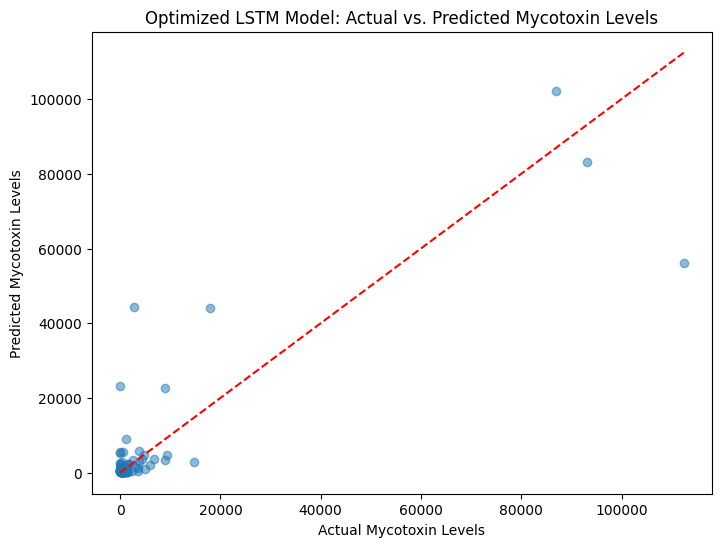

In [9]:
pca = PCA(n_components=30)  # Reduce dimensionality for LSTM compatibility
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio:", sum(pca.explained_variance_ratio_))

# Reshape data for LSTM (samples, timesteps, features)
X_pca_reshaped = X_pca.reshape((X_pca.shape[0], X_pca.shape[1], 1))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca_reshaped, y, test_size=0.2, random_state=42)

# Define Optimized LSTM Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.15),
    Dense(64, activation='relu'),
    Dropout(0.15),
    Dense(32, activation='relu'),
    Dropout(0.15),
    Dense(16, activation='relu'),
    Dropout(0.15),
    Dense(8, activation='relu'),
    Dropout(0.15),
    Dense(4, activation='relu'),
    Dropout(0.15),
    Dense(2, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='mse', metrics=['mae'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=45, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=32, verbose=1, callbacks=[early_stopping])

# Predict using the trained model
y_pred = model.predict(X_test).flatten()

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f"Optimized LSTM Model Mean Absolute Error (MAE): {mae}")
print(f"Optimized LSTM Model Root Mean Squared Error (RMSE): {rmse}")
print(f"Optimized LSTM Model R² Score: {r2}")

# Create a DataFrame with actual and predicted values
error_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
error_df['Error'] = abs(error_df['Actual'] - error_df['Predicted'])
error_df['Error_Percentage'] = (error_df['Error'] / error_df['Actual']) * 100

# Sort by highest error percentage
error_df_sorted = error_df.sort_values(by='Error_Percentage', ascending=False)
print("Top errors sorted by percentage:")
print(error_df_sorted.head(10))

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Mycotoxin Levels')
plt.ylabel('Predicted Mycotoxin Levels')
plt.title('Optimized LSTM Model: Actual vs. Predicted Mycotoxin Levels')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

# Comparison chart for actual and predicted values using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test.values, mode='lines+markers', name='Actual Values'))
fig.add_trace(go.Scatter(y=y_pred, mode='lines+markers', name='Predicted Values'))
fig.update_layout(title='Optimized LSTM Model: Comparison of Actual and Predicted Mycotoxin Levels',
                  xaxis_title='Sample Index',
                  yaxis_title='Mycotoxin Levels',
                  legend_title='Legend')
fig.show()


In [10]:
y_pred

array([   187.36586,   3635.911  ,    541.3782 ,    315.98273,
         2782.7168 ,    179.77248,    455.57785,   5486.961  ,
          208.97592,    356.34277,    183.57037,    268.57455,
          413.10028,   2074.886  ,    490.84808,   2019.4884 ,
          627.0098 ,    224.08708,   1103.2335 ,    231.14337,
          387.78738,    317.91486,    313.05875,  23149.523  ,
          327.79355,   2514.1616 ,    308.20227,    144.36925,
          607.6593 ,    309.2231 ,    347.9025 ,    419.78958,
          202.58319,    956.11145,   1064.9012 ,    392.2132 ,
         1815.7324 ,    961.79767,    452.03467,    179.36833,
         1027.7778 ,    459.09586,    500.32922,   1171.7952 ,
          749.91425,    120.47973,    990.1694 ,   3537.1353 ,
         2937.4927 ,   5704.628  ,   1373.2773 ,    321.84323,
        43995.195  ,  56223.035  ,    360.7478 ,    194.63603,
         2419.2349 ,   4649.6206 ,    228.11794,    268.78094,
          567.3869 ,   5161.162  ,  44379.984  ,   4724